C:\Users\Aspire\AppData\Local\Temp\ipykernel_10552\3653905323.py:62: UserWarning: The following kwargs were not used by contour: 'contours'
  pl.contour(labels == 2, contours=1, \


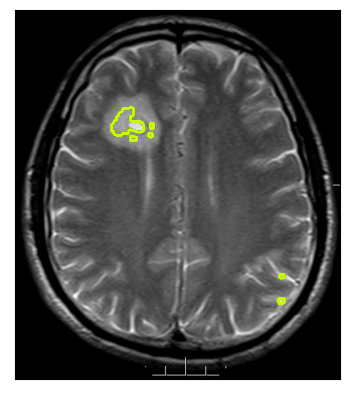

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm


import scipy as sp
import pylab as pl
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import KMeans
from skimage import io
from sklearn.cluster import MeanShift, estimate_bandwidth

img_ini = cv2.imread('Dataset/yes/Y3.jpg') # read image
gray_img = cv2.cvtColor(img_ini,cv2.COLOR_BGR2GRAY) #convert image to gray
gray = cv2.medianBlur(gray_img,3) #apply median filter to smoothen image


ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU) #applying thresholding  to get the skull portion

colormask = np.zeros(img_ini.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255)) #overlaying mask over original image
blended = cv2.addWeighted(img_ini,0.7,colormask,0.1,0)
b,g,r = cv2.split(blended)
rgb_img = cv2.merge([r,g,b])

ret, markers = cv2.connectedComponents(thresh) #finding the connected components in the image

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 

largest_component = np.argmax(marker_area)+1  #finding the largest one which will be the brain                    

brain_mask = markers==largest_component

brain_out = img_ini.copy()

brain_out[brain_mask==False] = (0,0,0) #filling rest of the background with black

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(brain_out,kernel,iterations = 1)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)

im = opening


# Make the feature vectors
X = np.reshape(im, (im.shape[0]*im.shape[1], im.shape[2]))
bandwidth = estimate_bandwidth(X, quantile=0.4, n_samples=500)
# Perform Clustering
km = MeanShift(bandwidth=bandwidth, bin_seeding=True)
km.fit(X.astype(float)) # the .astype method is only to stop the .fit method
# from throwing a warning.
labels = np.reshape(km.labels_, im.shape[0:2])

# Plotting results
pl.figure()
pl.imshow(img_ini)

N_clus = 3

for l in range(N_clus):
    pl.contour(labels == 2, contours=1, \
               colors=[pl.cm.nipy_spectral (l / float(N_clus)), ])
pl.xticks(())
pl.yticks(())
pl.show()